<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-3-Summary" data-toc-modified-id="Project-3-Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project 3 Summary</a></span><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dependencies</a></span></li></ul></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Poke-around" data-toc-modified-id="Poke-around-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Poke around</a></span></li></ul></li><li><span><a href="#Clean-&amp;-Feature-engineer" data-toc-modified-id="Clean-&amp;-Feature-engineer-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Clean &amp; Feature engineer</a></span><ul class="toc-item"><li><span><a href="#Quick-check-with-simple-models" data-toc-modified-id="Quick-check-with-simple-models-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Quick check with simple models</a></span></li><li><span><a href="#Poke-around" data-toc-modified-id="Poke-around-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Poke around</a></span></li></ul></li></ul></li><li><span><a href="#Visualize" data-toc-modified-id="Visualize-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualize</a></span><ul class="toc-item"><li><span><a href="#get-some-hints-from-autoviz" data-toc-modified-id="get-some-hints-from-autoviz-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>get some hints from autoviz</a></span><ul class="toc-item"><li><span><a href="#Hint-notes" data-toc-modified-id="Hint-notes-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Hint notes</a></span></li></ul></li></ul></li><li><span><a href="#Predict" data-toc-modified-id="Predict-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Predict</a></span><ul class="toc-item"><li><span><a href="#Get-some-hints-from-autoviml" data-toc-modified-id="Get-some-hints-from-autoviml-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Get some hints from autoviml</a></span><ul class="toc-item"><li><span><a href="#Hint-Notes" data-toc-modified-id="Hint-Notes-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Hint Notes</a></span></li></ul></li><li><span><a href="#Prep-for-manual-models" data-toc-modified-id="Prep-for-manual-models-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Prep for manual models</a></span></li><li><span><a href="#Precision-metric" data-toc-modified-id="Precision-metric-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Precision metric</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Loopy-Betas" data-toc-modified-id="Loopy-Betas-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Loopy Betas</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#Manual-Logistic-Regressions" data-toc-modified-id="Manual-Logistic-Regressions-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Manual Logistic Regressions</a></span></li><li><span><a href="#Try-XGboost" data-toc-modified-id="Try-XGboost-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Try XGboost</a></span></li></ul></li></ul></div>

# Project 3 Summary
Kirill Kogan

I'm working with the How Couples Meet and Stay Together Survey from Standford https://data.stanford.edu/hcmst.
The goal is to build a model that can predict break-ups.
The data set has hundreds of features, because it was a longitudinal study over 5 waves.   

I pivoted to this data set just this monday, and It took me a while to wrap my head around the methodology of the study, so I'm a bit behind on the modeling aspect.   
   
   
My current best model only has an f1 of .135, though I'll likely end up targeting a high precision as the primary metric, so I might go with f-beta < 1.  
   
   
My next steps are :
- wrap up the models for Logistic regression and random forest
  - Longitudinal data
  - what do i do with age?
  - should i bother with fbeta? or just precision?
- add some of the remaining features from the survey to try to improve the score
- _**Stretch:** make an interface to generate a prediction from a new user survey—ideally with something like a chatbot._
  - how can i turn this into a survey chat bot?

## Dependencies

In [37]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline


import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 600)
pd.set_option('display.width', 500)

import re
import pprint
pp = pprint.PrettyPrinter(indent=4)

#autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
from autoviml.Auto_ViML import Auto_ViML

# modeling tools
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score, fbeta_score, make_scorer
from sklearn.ensemble import RandomForestClassifier

#model persistence
from joblib import dump, load

#!pip install pydotplus
#!pip install GraphViz
import pydotplus as pydot
from IPython.display import Image
from sklearn.externals.six import StringIO
import graphviz


# Data

## Load

In [4]:
def load_data():
    """
    Load 
    """
    #https://data.stanford.edu/hcmst
    df_merged = pd.read_stata('/Users/kirill.kogan/Documents/data/ICPSR_30103/HCMST_ver_3.04.dta')
    df4 = pd.read_stata('/Users/kirill.kogan/Documents/data/ICPSR_30103/wave_4_supplement_v1_2.dta')
    df5 = pd.read_stata('/Users/kirill.kogan/Documents/data/ICPSR_30103/HCMST_wave_5_supplement_ver_1.dta')
    df_merged = pd.merge(df_merged, df4, on='caseid_new', how='left')
    df_merged = pd.merge(df_merged, df5, on='caseid_new', how='left')
    return df_merged


In [10]:
# Raw dataframe starting point

df_raw = load_data()

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4002 entries, 0 to 4001
Columns: 525 entries, caseid_new to ppcmarit_2007_yrmo
dtypes: category(434), float32(27), float64(55), int32(4), int8(4), object(1)
memory usage: 4.0+ MB


### Poke around

In [0]:
[column for column in df_raw.columns  
    if re.match(r'.*w.*', column)] 

In [0]:
df_raw['w2345_combo_breakup'].value_counts()

In [0]:
df_raw['w234_combo_breakup'].value_counts()

In [0]:
df_raw.groupby(['w2_broke_up', 'parental_approval']).count()

In [0]:
df_raw[df_raw['w2_broke_up']=='broke up'].sample(20)

## Clean & Feature engineer

In [32]:
def clean_data(df_dirty):
    """
    Repeatable clean
    """
    df = df_dirty.copy()
    #only included partnered at start of study
    df = df[df['qflag'] == 'partnered']
    #turn categoricals into strings
    df[df.loc[:, df.dtypes == 'category'].columns] = df.loc[:, df.dtypes == 'category'].astype(str)
    df.replace({'nan':np.nan}, inplace=True)

    # build up a dataframe for visualization and ML
    df_ml = pd.DataFrame()
    df_ml['caseid_new'] = df['caseid_new']
    #dropnas
    # df =  df[~df['w2345_combo_breakup'].isna()]
    
    # TODO follow up with instructor about whether weights should be utilized
       
    # other 
    
    #
    # age
    #
    df_ml['age_difference'] = df['age_difference']
    df_ml['ppage'] = df['ppage'].astype('int')
    df_ml['partner_age'] = df['q9']
    df_ml['partner_years_younger'] = df_ml['ppage']-df_ml['partner_age']
    
    #
    # sexual orientation
    #
    df_ml['ppgender']= (df['ppgender'] == 'female').astype('int')
    df_ml['lgb'] = (df['glbstatus'] == 'glb').astype('int')
    df_ml['same_sex_couple'] = df['same_sex_couple']#.replace({'same-sex couple':1, 'different sex couple':0})

    #
    # money & lifestyle
    #
    df_ml['hhinc'] = df['hhinc']
    df_ml['pphh_internet'] = (df['ppnet'] == 'yes').astype('int')
    df_ml['ppmsacat_metro'] = (df['ppmsacat'] == 'metro').astype('int')

    #
    # education
    #
    df_ml['respondent_yrsed'] = df['respondent_yrsed']
    df_ml['partner_yrsed'] = df['partner_yrsed']

    #
    # family
    #
    
    df_ml['parental_approval'] = df['parental_approval'].fillna('unknown')#.replace({'approve':1, "don't approve or don't know":0})
    df_ml['respondent_mom_yrsed'] = df['respondent_mom_yrsed']
    df_ml['respondent_mom_yrsed'].fillna(np.mean(df['respondent_mom_yrsed']) , inplace=True)
    df_ml['partner_mom_yrsed'] = df['partner_mom_yrsed']
    df_ml['partner_mom_yrsed'].fillna(np.mean(df['partner_mom_yrsed']) , inplace=True)
    
    df_ml['children_in_hh'] = df['children_in_hh']
    df_ml['pphouseholdsize'] = df['pphouseholdsize']

    # 
    # ethnicity & nationality
    #
    df_ml['us_raised'] = (df['q15a1_compressed'] == 'United States').astype('int')
    # made things a lot worse
    #df_ml['respondent_race'] = df['respondent_race']
    #df_ml['partner_race'] = df['partner_race']
    # what about this?
    df_ml['mixed_race'] = (df['partner_race'] != df['respondent_race']).astype(int)
        
    #
    # religion
    #
#     df_ml['respondent_religion'] = df['papreligion']
#     df_ml['partner_religion'] = df['q7b'].replace({'refused':np.nan})
#     df_ml['respondent_religious'] = (df_ml['respondent_religion'] != 'None').astype('int')
#     df_ml['partner_religious'] = (df_ml['partner_religion'] != 'None').astype('int')
#     df_ml['same_religious_beliefs'] = (df_ml['partner_religion'] == df_ml['respondent_religion']).astype('int')

    #
    # politics
    #
#     df_ml['partner_politics'] = df['q12'].replace({'refused':np.nan})
#     df_ml['respondent_politics'] = df['pppartyid3']
#     df_ml['same_or_ambivalent_politics'] = ((df_ml['partner_politics'] == df_ml['respondent_politics']) | (df_ml['partner_politics'] == 'no preference')).astype('int')
    
    #
    # type of relationship
    #
    df_ml['1_married'] = df['married'].replace({'married':1,'not married':0}) # main survey 1
    df_ml['1_unmarried_sex_partner'] = (df['s2'] == 'yes, i have a sexual partner (boyfriend or girlfriend)').astype('int')
    df_ml['1_unmarried_rom_partner'] = (df['s2'] == 'i have a romantic partner who is not yet a sexual partner').astype('int')
    df_ml['coresident'] = df['coresident'].replace({'Yes':1, 'No':0})

    #
    # qualitative
    #
    df_ml['relationship_quality'] = df['relationship_quality']


    #
    # how they met
    # 
    df_ml['met_through_friends'] = (df['met_through_friends'] == 'meet through friends').astype('int')
    df_ml['met_through_as_neighbors'] = df['met_through_as_neighbors'].replace({"did not meet through or as neighbors":0,"met through or as neighbors":1})
    df_ml['met_through_family'] = df['met_through_family'].replace({"met through family":1,"not met through family":0})
    df_ml['either_internet_adjusted'] = df['either_internet_adjusted']#.replace({"met online":1,"not met online":0})
    df_ml['met_through_as_coworkers'] = df['met_through_as_coworkers']

    # 
    # relationship histories
    #
    # #df_ml['past_marriages'] = need to do some math here Q17A & Q17B

    #
    # targets
    #
    #df_ml['w2_broke_up_y'] = (df['w2_broke_up'] == 'broke up').astype('int')
    #df_ml['w23_broke_up_y'] = df['w2w3_combo_breakup'].replace({'still together, or lost to follow-up, or partner deceased':0, 'broke up':1})  
    #df_ml['w234_broke_up_y'] = df['w234_combo_breakup'].replace({'still together at w4, or some follow-up w/o break-up':0, 'broke up at wave 2, 3, or 4':1})  
    df_ml['w2345_broke_up_y'] = df['w2345_combo_breakup'].replace({'still together at w5 or some follow-up w/o breakup':0, 'broke up at wave 2,3,4, or 5':1})  


    # this will take calculating relationship lenght at each wave of surveying
    df_ml['rel_length_start'] = df['how_long_relationship']
    # this is questionable because I don't think I know exactly when they broke up
    df_ml['rel_length_at_w2'] = df_ml['rel_length_start'] + (df['w2_days_elapsed']/365)
    df_ml['rel_length_at_w2'].fillna(df_ml['rel_length_start'] + np.mean(df['w2_days_elapsed'])/365, inplace=True)
    
    #
    # 
    #
    
    #
    # Drop NA
    # hold off on drop na to do auto viz
    #df_ml = df_ml.dropna()
    
    # drop redundant columns
    return df_ml.drop(['rel_length_start', 'caseid_new'], axis=1)



In [33]:
# generate clean DataFrame to model

df = clean_data(df_raw)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3009 entries, 0 to 4001
Data columns (total 31 columns):
age_difference              2990 non-null float64
ppage                       3009 non-null int64
partner_age                 2990 non-null float64
partner_years_younger       2990 non-null float64
ppgender                    3009 non-null int64
lgb                         3009 non-null int64
same_sex_couple             3009 non-null object
hhinc                       3009 non-null float32
pphh_internet               3009 non-null int64
ppmsacat_metro              3009 non-null int64
respondent_yrsed            3009 non-null float32
partner_yrsed               3001 non-null float32
parental_approval           3009 non-null object
respondent_mom_yrsed        3009 non-null float32
partner_mom_yrsed           3009 non-null float32
children_in_hh              3009 non-null int8
pphouseholdsize             3009 non-null int8
us_raised                   3009 non-null int64
mixed_race   

### Quick check with simple models

In [16]:
def plot_confusion(model, y_test, X_test, label):
    confusion = confusion_matrix(y_test, model.predict(X_test))
    plt.figure(dpi=150)
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
               xticklabels=['together', 'broke up'],
               yticklabels=['together', 'broke up'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(label + ' Confusion matrix');

In [38]:
def check_simple_models(X_train, X_test, y_train, y_test):

    tree = GridSearchCV(estimator =  DecisionTreeClassifier(), 
                        scoring='precision', 
                        cv=5, 
                        n_jobs=-1, 
                        verbose=2, 
                        param_grid={
                            "class_weight": ['balanced'], #{1 : 2, 0 : 1}
                            "min_samples_split": [4, 8, 16, 32]
                        }
                       )
    tree.fit(X_train, y_train)
    plot_confusion(tree.best_estimator_, y_test, X_test, f'Tree precision, scored:{tree.best_score_}')
    export_graphviz(tree.best_estimator_, out_file='tree.dot',feature_names = X_train.columns)
    print("tree params", tree.best_params_, '\n')
    dump(tree, 'models/simple_tree.joblib')

    
    forest = GridSearchCV(estimator = RandomForestClassifier(bootstrap=True), 
                          param_grid={ 
                              'class_weight': ['balanced'], #{1 : 2, 0 : 1}
                              'max_features': ['log2'], 
                              'min_samples_split': [4, 8, 16, 32], 
                              'n_estimators': [500]
                          },
                          scoring='precision', 
                          cv=5, 
                          verbose=2, 
                          n_jobs=-1
                         )
    forest.fit(X_train, y_train)
    plot_confusion(forest.best_estimator_, y_test, X_test, f'Forests precision, scored:{forest.best_score_}')
    feature_importances = pd.DataFrame(forest.best_estimator_.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False) 
    print("forest params", forest.best_params_, '\n')
    dump(forest, 'models/simple_forest.joblib')

    return feature_importances
    #export_graphviz(forest.best_estimator_, out_file='forest.dot',feature_names = X_train.columns)



Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    2.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


tree params {'class_weight': 'balanced', 'min_samples_split': 4} 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    2.8s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.5s finished


forest params {'class_weight': 'balanced', 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 500} 



,importance
rel_length_at_w2,0.123357
coresident,0.108080
1_married,0.097554
partner_age,0.061696
ppage,0.060928
1_unmarried_sex_partner,0.049912
relationship_quality_excellent,0.049519
hhinc,0.040941
partner_years_younger,0.038673
age_difference,0.033122


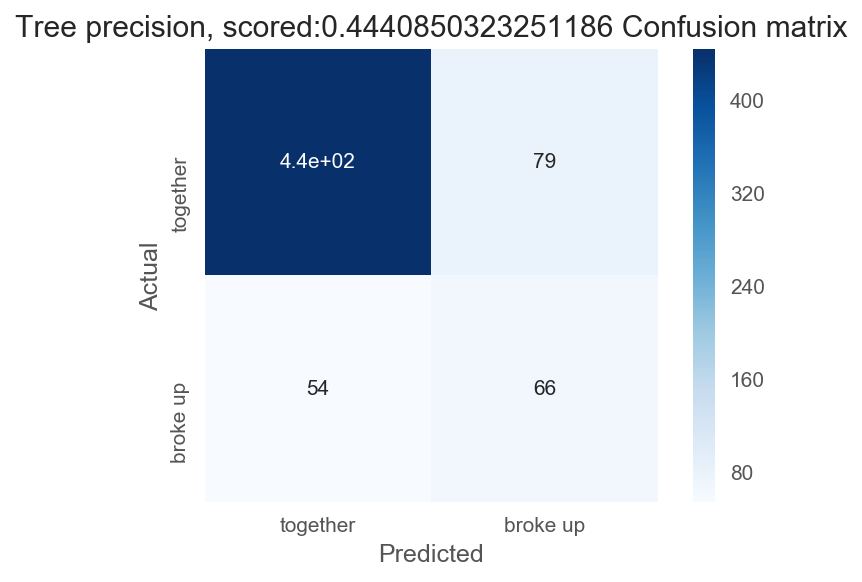

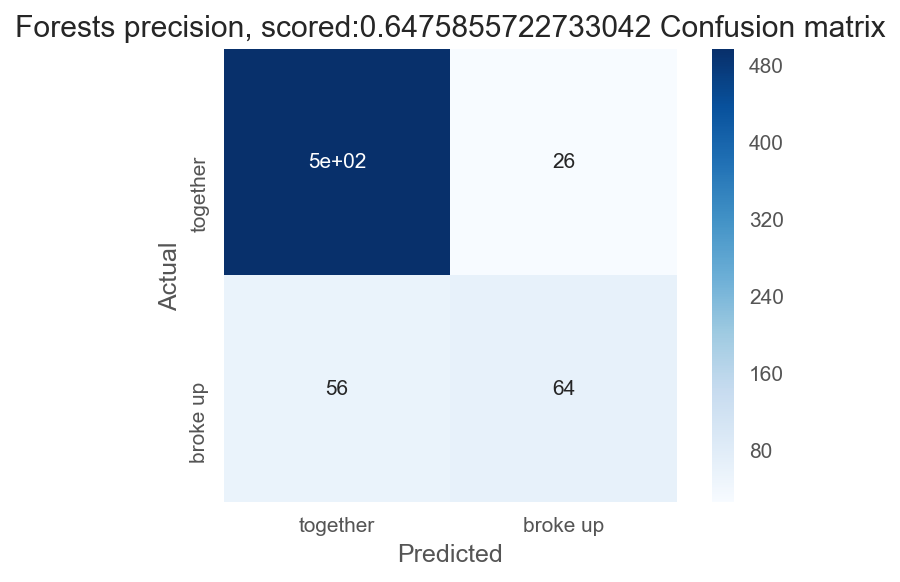

In [39]:

df_check = df.dropna()
df_check = pd.get_dummies(df_check, drop_first=False)

check_simple_models(*train_test_split(df_check.drop(['w2345_broke_up_y'],axis=1), 
                                                    df_check['w2345_broke_up_y'], 
                                                    test_size=.25, 
                                                    random_state=555))



### Poke around

In [ ]:
df_check['parental_approval_unknown'].value_counts()

# Visualize

## get some hints from autoviz

In [15]:
dft = AV.AutoViz('', ',', 'w2345_combo_breakup', df, verbose=1, max_cols_analyzed=70)

Shape of your Data Set: (3009, 39)
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  11
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  17
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  2
    39 Predictors classified...
        This does not include the Target column(s)
    2 variables removed since they were ID or low-information variables
    List of variables removed: ['respondent_religious', 'partner_religious']
Could not find given target var in data set. Please check input
Not able to read or load file. Please check your inputs and try again...


### Hint notes

**Looks like 1_unmarried_sex_partner and 1_unmarried_rom_partner (romantic not sexual) are most distinct for the target classes. Going to need to do better.**

# Predict

## Get some hints from autoviml

In [59]:
#randomize, also, doesn't like dummies, so save that for later
df = df.sample(frac=1)
num = int(0.8*df.shape[0])
train = df[:num]
test = df[num:]


Train (Size: 2407,36) has Single_Label with target: ['w2_broke_up_y']
"
 ################### Binary-Class ##################### " 
Shuffling the data set before training
 Class  -> Counts -> Percent
     0:    2211  ->   91.9%
     1:     196  ->    8.1%
Selecting 2-Class Classifier...
    Using GridSearchCV for Hyper Parameter tuning...
    Target w2_broke_up_y is already numeric. No transformation done.
    Top columns in Train with missing values: ['parental_approval', 'met_through_as_neighbors', 'met_through_family', 'rel_length_at_w2', 'age_difference']
         and their missing value totals: [717, 64, 64, 22, 16]
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  9
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  15
    Number of Discrete String Columns =  0
    Number of NLP String Columns

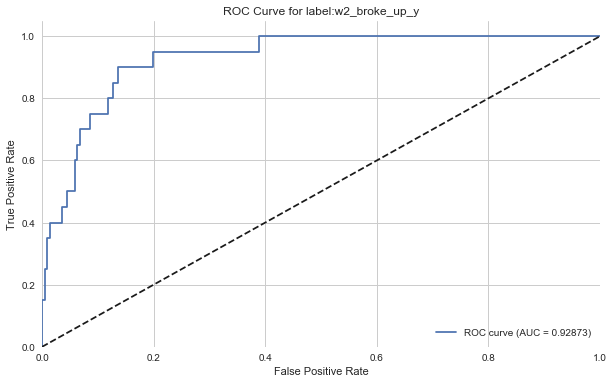

Average precision-recall score: 0.59
Macro F1 score, averaged over all classes: 0.67


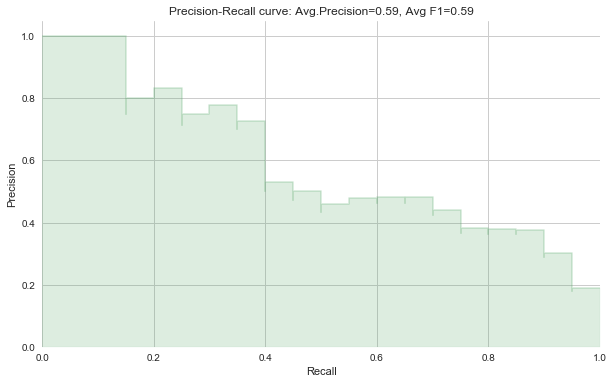

After multiple models, Ensemble Model Results:
    Balanced Accuracy Score = 92.946%
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       221
           1       0.67      0.30      0.41        20

    accuracy                           0.93       241
   macro avg       0.80      0.64      0.69       241
weighted avg       0.92      0.93      0.92       241

[[218   3]
 [ 14   6]]

Ensembling Models is better than Single Model for this data set.
    Time taken for this Target (in seconds) = 37
Plotting Feature Importances to explain the output of model

###################################################################################
Training model on complete Train data and Predicting using give Test Data...
Leaving Top 4 continuous variables as is...
    No Entropy Binning specified
Number of numeric variables = 4
    No variables were removed since no highly correlated variables found in data
    Adding 27 categorical variables to

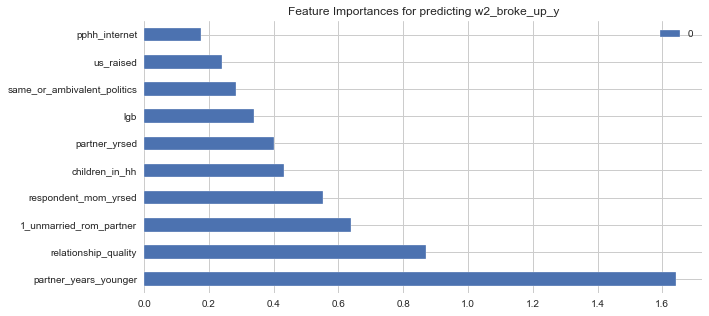

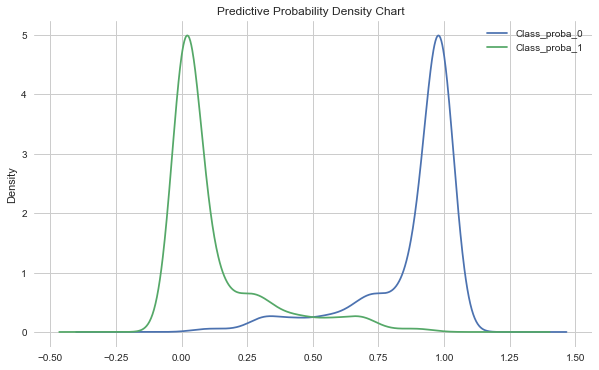

In [60]:
m, feats, trainm, testm = Auto_ViML(train, 'w2_broke_up_y', test, sample_submission='', 
                                    scoring_parameter = 'precision', verbose=1, KMeans_Featurizer = False, hyper_param='GS', Boosting_Flag=None, Imbalanced_Flag=True)


### Hint Notes
Looks like I should be able to get an f1 of roughly .67 

## Prep for manual models

In [214]:
df = pd.get_dummies(df, drop_first=False)
df.sample(10)

,age_difference,ppage,partner_age,partner_years_younger,ppgender,lgb,hhinc,pphh_internet,ppmsacat_metro,respondent_yrsed,partner_yrsed,parental_approval,respondent_mom_yrsed,partner_mom_yrsed,children_in_hh,pphouseholdsize,us_raised,respondent_religious,partner_religious,same_religious_beliefs,same_or_ambivalent_politics,1_married,1_unmarried_sex_partner,1_unmarried_rom_partner,coresident,met_through_friends,met_through_as_neighbors,met_through_family,w2_broke_up_y,rel_length_at_w2,respondent_religion_baptist-any denomination,respondent_religion_buddhist,respondent_religion_catholic,respondent_religion_eastern orthodox,respondent_religion_hindu,respondent_religion_jewish,respondent_religion_mormon,respondent_religion_muslim,respondent_religion_none,respondent_religion_other christian,"respondent_religion_other non-christian, please specify:",respondent_religion_pentecostal,"respondent_religion_protestant (e.g., methodist, lutheran, presbyterian, episcopal)",partner_religion_baptist - any denomination,partner_religion_buddhist,partner_religion_catholic,partner_religion_eastern orthodox,partner_religion_hindu,partner_religion_jewish,partner_religion_mormon,partner_religion_muslim,partner_religion_none,partner_religion_other christian,"partner_religion_other non-christian, please specify",partner_religion_pentecostal,"partner_religion_protestant (e.g. methodist, lutheran, presbyterian, episcopal)","partner_politics_another party, please specify",partner_politics_democrat,partner_politics_independent,partner_politics_no preference,partner_politics_republican,respondent_politics_democrat,respondent_politics_other,respondent_politics_republican,relationship_quality_excellent,relationship_quality_fair,relationship_quality_good,relationship_quality_poor,relationship_quality_very poor
752,NaN,95,NaN,NaN,1,0,27250.0,0,1,20.0,16.0,NaN,7.5,12.0,0,1,1,1,1,0,1,1,0,0,0.0,0,0.0,0.0,0,70.069160,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
1497,6.0,38,44.0,-6.0,0,0,45000.0,1,1,12.0,16.0,1.0,16.0,16.0,1,2,1,1,1,1,1,0,1,0,0.0,1,0.0,0.0,0,6.071233,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3037,1.0,54,53.0,1.0,1,0,137250.0,1,1,12.0,12.0,1.0,11.0,12.0,0,2,1,1,1,0,1,0,1,0,1.0,1,0.0,0.0,0,12.063014,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
3625,16.0,59,43.0,16.0,1,0,32250.0,0,0,12.0,12.0,1.0,12.0,12.0,0,1,1,1,1,1,1,1,0,0,0.0,0,0.0,0.0,0,5.069159,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0
2892,5.0,37,42.0,-5.0,0,1,32250.0,0,1,12.0,12.0,1.0,12.0,12.0,0,3,1,1,1,0,1,0,1,0,1.0,0,1.0,0.0,0,11.069159,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
438,10.0,44,34.0,10.0,1,1,37250.0,1,1,20.0,14.0,0.0,12.0,12.0,0,2,1,1,1,1,0,0,1,0,0.0,0,0.0,0.0,1,13.147945,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
3948,2.0,63,61.0,2.0,0,0,67250.0,1,1,13.0,14.0,1.0,13.0,14.0,0,1,1,1,1,0,0,1,0,0,1.0,0,0.0,0.0,0,36.969863,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0
1257,10.0,49,39.0,10.0,0,0,8750.0,1,1,13.0,12.0,NaN,12.0,12.0,0,10,1,1,1,0,1,0,1,0,0.0,0,0.0,0.0,0,11.065753,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3818,1.0,55,56.0,-1.0,1,0,55000.0,1,1,12.0,16.0,NaN,11.0,12.0,0,2,1,1,1,0,1,1,0,0,1.0,0,0.0,0.0,0,36.069160,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2975,1.0,32,31.0,1.0,1,0,67250.0,1,0,12.0,12.0,1.0,12.0,12.0,0,4,1,1,1,0,1,1,0,0,1.0,1,0.0,0.0,0,15.069159,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0


In [215]:
df = df.dropna()

In [256]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['w2_broke_up_y'],axis=1), 
                                                    df['w2_broke_up_y'], 
                                                    test_size=.3, 
                                                    random_state=555)

## Precision metric

### Decision Tree


In [ ]:
nice_tree = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), 
                    scoring='precision', cv=5, n_jobs=-1, verbose=1,
                    param_grid={
                        "min_samples_split": [2,4,8,16,32]
                    } 
                 )
nice_tree.fit(X_train, y_train)
print(nice_tree.best_score_, grid.best_params_)
plot_confusion(nice_tree.best_estimator_, y_test, X_test, f'Tree precision, scored:{nice_tree.best_score_}')


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

0.6595331649359154
{'class_weight': 'balanced_subsample', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 500}


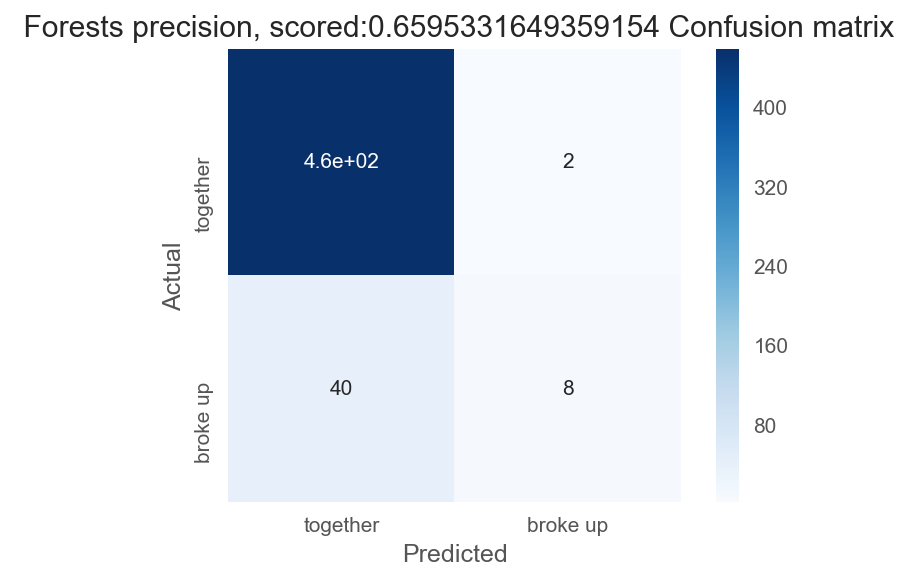

In [239]:
# Number of trees in random forest
n_estimators = [100, 500]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Minimum number of samples required to split a node
min_samples_split = [16, 8, 4, 2]
# Weighting based on sample or entier train set
class_weight = ['balanced_subsample', 'balanced']

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'class_weight': class_weight}

#for beta in fbetas:
    #print("beta", beta)
    #fbeta_scorer = make_scorer(fbeta_score, beta=beta)
nice_forest = GridSearchCV(estimator = RandomForestClassifier(bootstrap=True), param_grid=param_grid,
                       scoring='precision', cv=5, verbose=2, n_jobs=-1)

nice_forest.fit(X_train, y_train)
print(nice_forest.best_score_)
print(nice_forest.best_params_)

plot_confusion(nice_forest.best_estimator_, y_test, X_test, f' Forests precision, scored:{nice_forest.best_score_}')



,importance
rel_length_at_w2,0.112028
coresident,0.090932
1_married,0.081338
partner_age,0.049104
ppage,0.045652
1_unmarried_sex_partner,0.042424
hhinc,0.040183
relationship_quality_excellent,0.039890
partner_years_younger,0.036863
parental_approval,0.031371


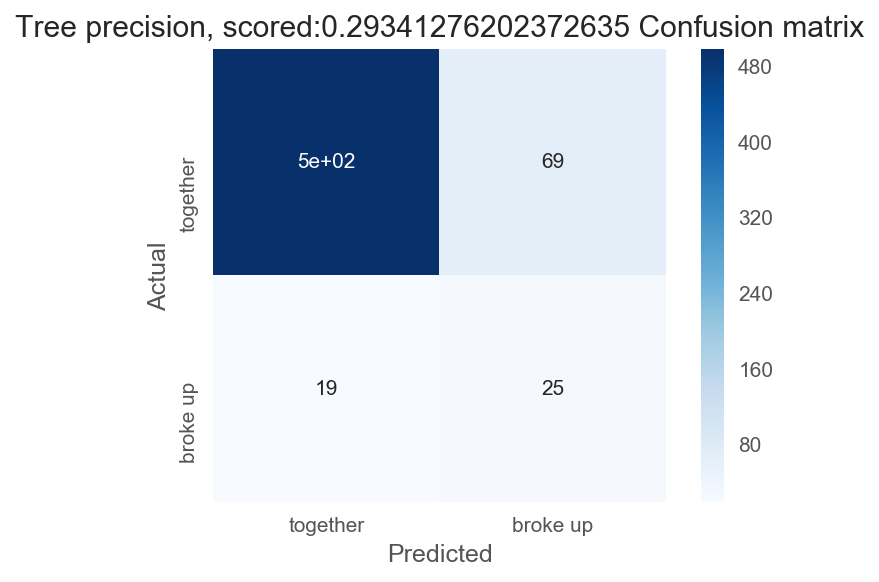

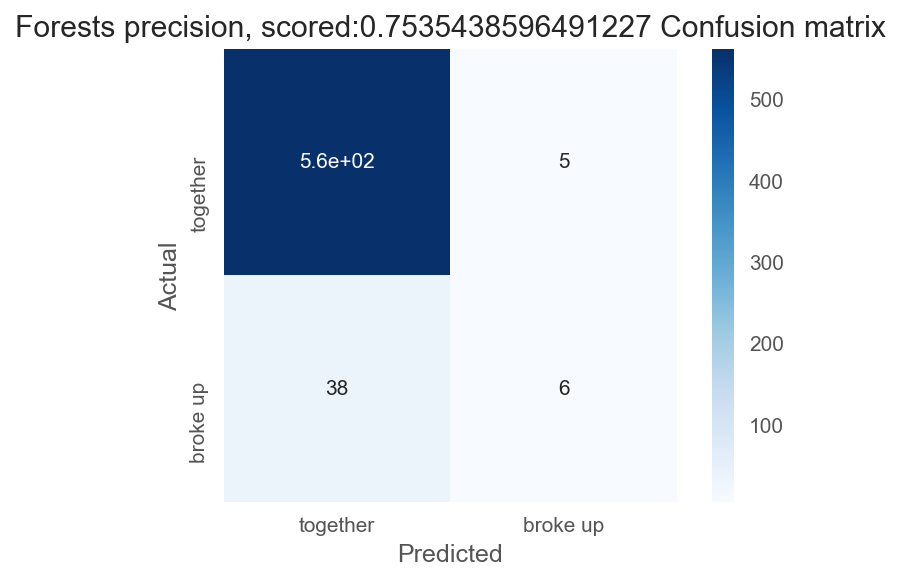

In [290]:
check_simple_models(X_train, X_test, y_train, y_test)

### Loopy Betas

In [232]:
fbetas = np.arange(.01,1,.2)

beta 0.01
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.3278784962565948
{'min_samples_split': 4}
beta 0.21000000000000002
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.3155866671674001
{'min_samples_split': 8}
beta 0.41000000000000003
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.3297995130400937
{'min_samples_split': 8}
beta 0.6100000000000001
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.3377763554413614
{'min_samples_split': 8}
beta 0.81
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13

0.33559582605092614
{'min_samples_split': 8}


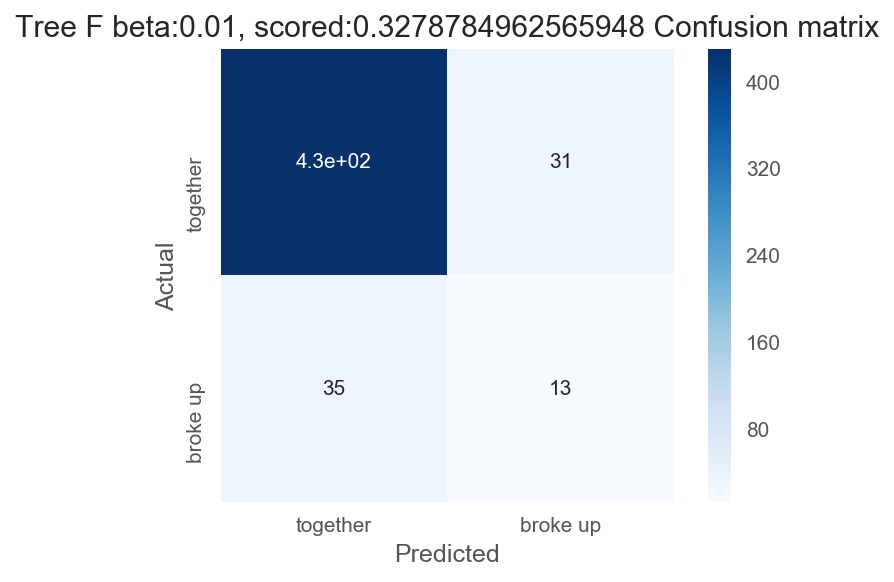

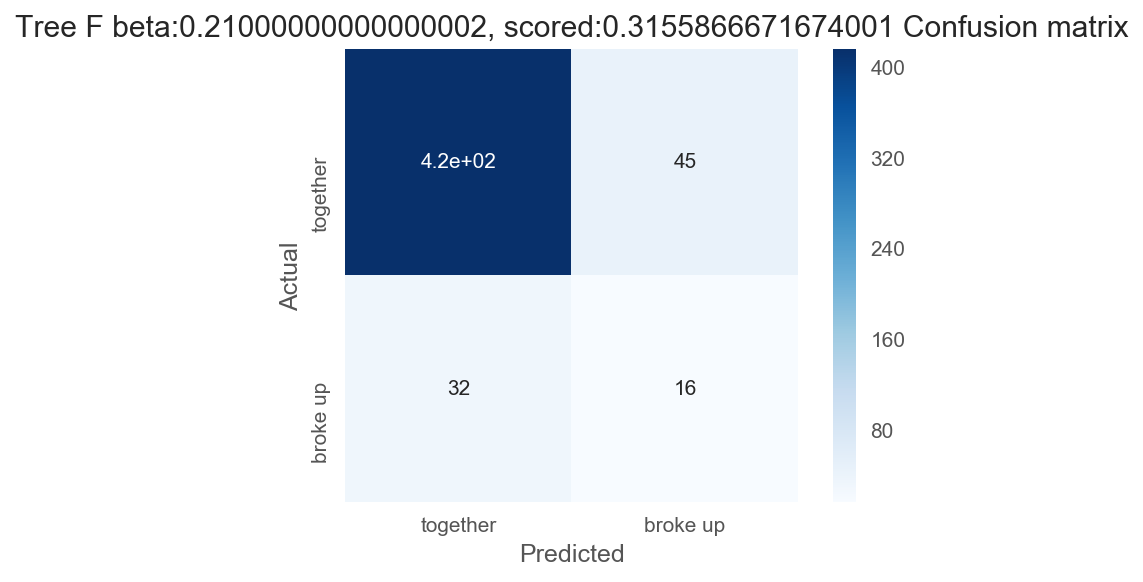

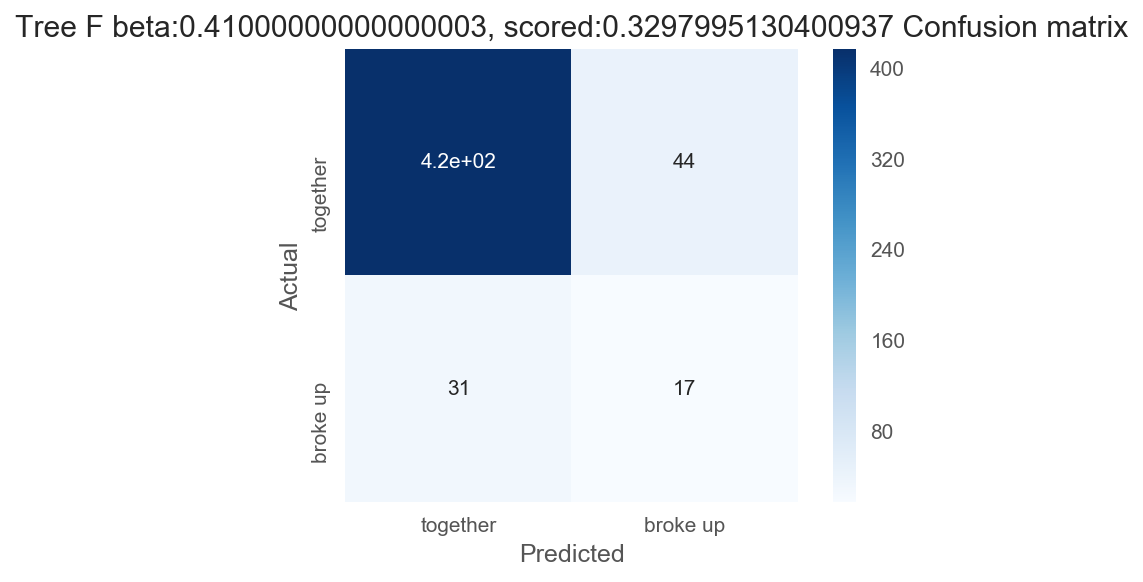

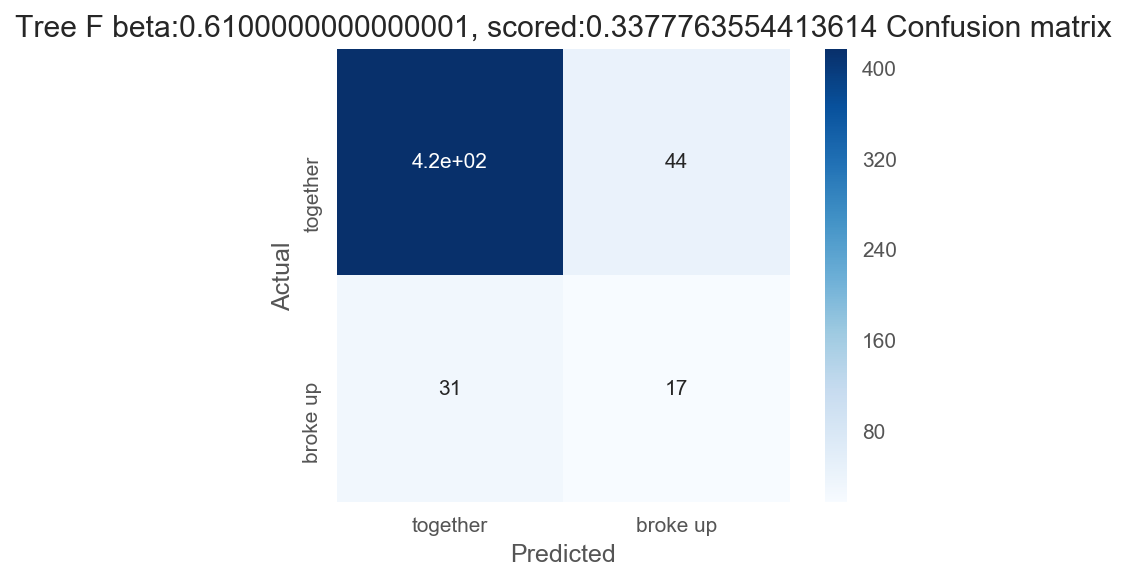

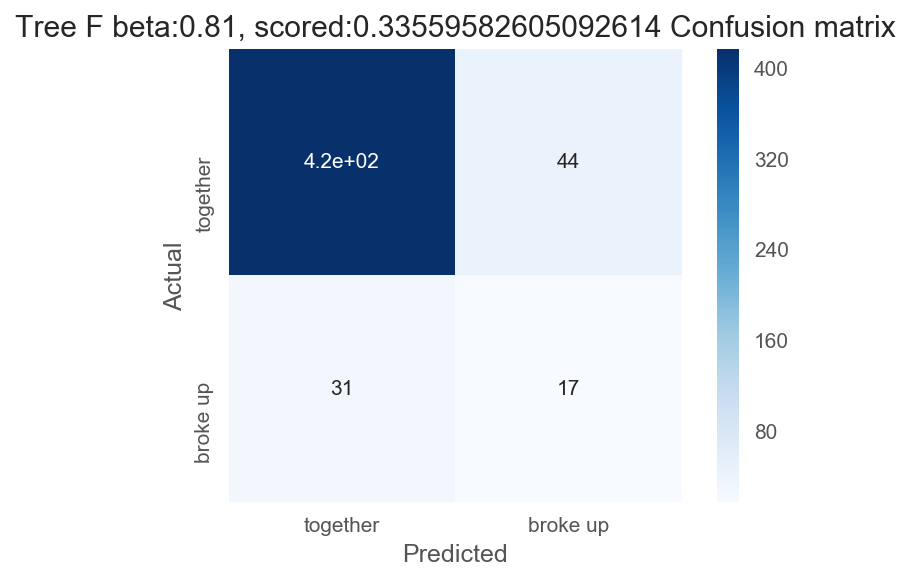

In [234]:
tree_models = []

for beta in fbetas:
    print("beta", beta)
    fbeta_scorer = make_scorer(fbeta_score, beta=beta)
    grid = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), 
                        scoring=fbeta_scorer, cv=5, n_jobs=-1, verbose=1,
                        param_grid={
                                       "min_samples_split": list(range(2, 50))
                                   } 
                       )
    grid.fit(X_train, y_train)
    print(grid.best_score_)
    print(grid.best_params_)
    fbeta_tree_models.append(grid)
    plot_confusion(grid.best_estimator_, y_test, X_test, f'Tree F beta:{beta}, scored:{grid.best_score_}')


In [163]:
# Export the structure of the tree to a file

export_graphviz(dt, out_file='tree.dot',feature_names = X_train.columns)

head: dt.dot: No such file or directory


In [ ]:
# Now:
# 1) Open a new browser tab and go to http://webgraphviz.com 
# 2) Open the tree.dot file as a text file
# 3) Copy and Paste the text of the file into the webpage

# Poke around inside the structure of the tree object
# Specifically, look at the "feature" and "threshold"
# These are indexed by the "node" of the tree.  First element is the root.
# Usually counts "depth first"

### Random Forest

In [231]:

# Number of trees in random forest
n_estimators = [100, 300, 900]
# Number of features to consider at every split
max_features = [None, 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [4, 12, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 6, 18]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 3, 9]
# Method of selecting samples for training each tree
bootstrap = True
# Weighting based on sample or entier train set
class_weight = ['balanced_subsample', 'balanced']

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'class_weight': class_weight}
beta_forests = []

#for beta in fbetas:
    #print("beta", beta)
    #fbeta_scorer = make_scorer(fbeta_score, beta=beta)
grid = GridSearchCV(estimator = RandomForestClassifier(bootstrap=bootstrap), param_grid= param_grid,
                       scoring='precision', cv= 5, verbose=2, n_jobs= -1)

grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
beta_forests.append(grid)
plot_confusion(grid.best_estimator_, y_test, X_test, f' Forests precision, scored:{grid.best_score_}')




beta 0.1
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  8.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': ['balanced_subsa

0.5528433694104249
{'class_weight': 'balanced', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 300}
beta 0.15000000000000002
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  8.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': ['balanced_subsample', 'balanced'],
                         'max_depth': [4, 12,

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.5284211183895376
{'class_weight': 'balanced_subsample', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
beta 0.20000000000000004
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  8.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': ['balanced_subsample', 'balanced'],
                         'max_depth': [4, 12,

0.5121854865945678
{'class_weight': 'balanced', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 300}
beta 0.25000000000000006
Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.1min


KeyboardInterrupt: 

IndexError: list index out of range

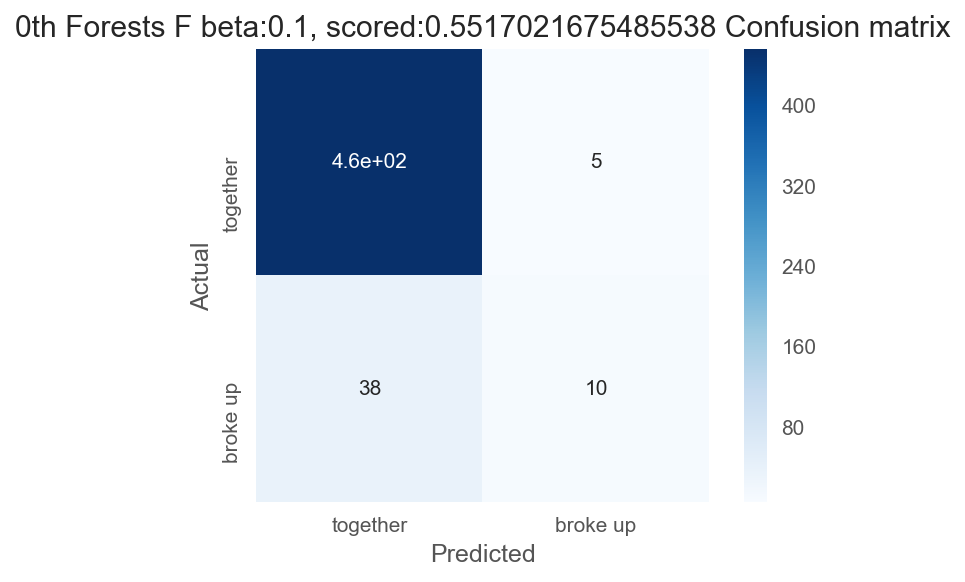

In [230]:
for i in range(len(fbetas)):
    plot_confusion(beta_forests[i].best_estimator_, y_test, X_test, f'{i}th Forests F beta:{fbetas[i]}, scored:{beta_forests[i].best_score_}')


## Manual Logistic Regressions


## Try XGboost